Họ và tên : Nguyễn Minh Phú

MSSV:20280072

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- MaxHR: Maximum heart rate achieved. Has data type $int64$, numeric value from 60 to 202.
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

## import library

In [1]:
#! pip install pandas_profiling
#!pip install scikit-plot

In [2]:

import pandas as pd # pandas 
import numpy as np # numpy
import time
import matplotlib.pyplot as plt
import ydata_profiling as pp
from ydata_profiling import ProfileReport
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
import seaborn as sns


## Load Dataset

In [3]:
# read data using Pandas DataFrame
def read_dataset(path):
    # Todo: read_csv from a path and return a DataFrame
    df = pd.read_csv(path)
    display(df.head())
    return df

In [4]:
path = "C:\\Users\\Phu\\OneDrive - VNU-HCMUS\\TH_ML\\Week 02\\heart.csv" # Path to your file

df = read_dataset(path)
#ToDo: Show histogram of dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


## Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,54.007901,0.683973,1.005643,132.117381,247.497743,0.168172,0.495485,149.492099,0.310384,1.083296,1.424379,0.714447,2.278781,0.564334
std,9.126292,0.465186,1.024542,16.807511,47.209995,0.374230,0.526669,23.921327,0.462912,1.147935,0.556861,1.028825,0.572576,0.496124
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,245.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,206.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.target.value_counts()

1    500
0    386
Name: target, dtype: int64

In [9]:
df.target.value_counts(normalize=True)

1    0.564334
0    0.435666
Name: target, dtype: float64

Biến mục tiêu để phân loại có tỷ lệ 56/44

In [10]:
print(df.dtypes)


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [11]:
#?pp.ProfileReport

In [12]:
pp.ProfileReport(df).to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Ta có được một vài ý nghĩa thống kê :

thalach (Patient's highest heart rate) có mối liên hệ tương quan với target

oldpeak (stress level of the patient) có mối liên hệ tương quan với target

cp (patient's chest pain level) có mối liên hệ tương quan với target

ca () có mối liên hệ tương quan với target


In [13]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,64,322
1,216,284


Theo tập dữ liệu ta có 280 nữ trong tập dữ liệu, 216 (77%) trong đó có bệnh tim mạch, trong khi 64 (23%) còn lại không.Tương tự có 606 nam trong tập dữ liệu, 284 (47%) có bệnh tim mạch và 322 (53%) còn lại thì không. Từ đó ta có thể thấy phụ nữ có khả năng mắc bệnh tim mạch nhiều hơn nam. 

Và nếu ta chỉ xét giữa một cá thể (nam hoặc nữ) theo target thuần thì ta có :
P(heart disease) = (216 + 284) / (64 + 322 + 216 + 284) = 500 / 886 = 56.4%
P(no heart disease) = (64 + 322) / (64 + 322 + 216 + 284) = 386 / 886 = 43.6%

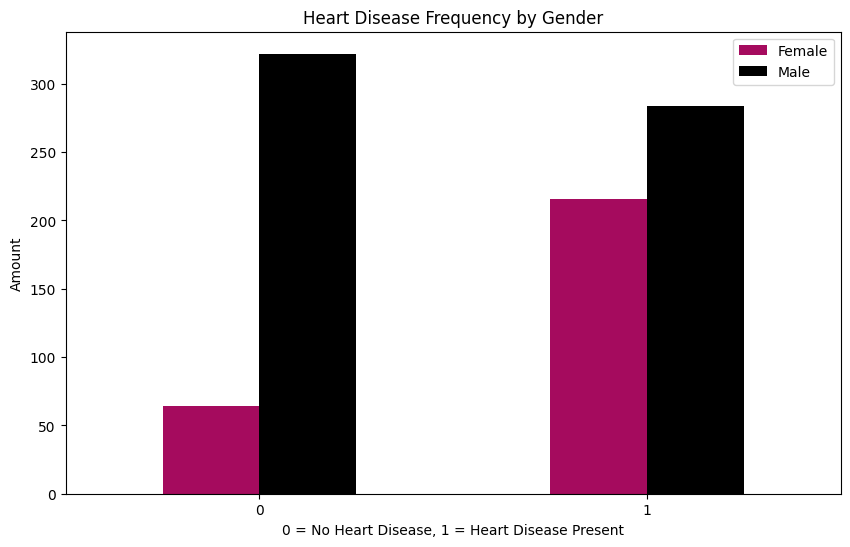

In [14]:
%matplotlib inline
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["#a50b5e", "black"])

plt.title("Heart Disease Frequency by Gender")
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease Present")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);
plt.show()

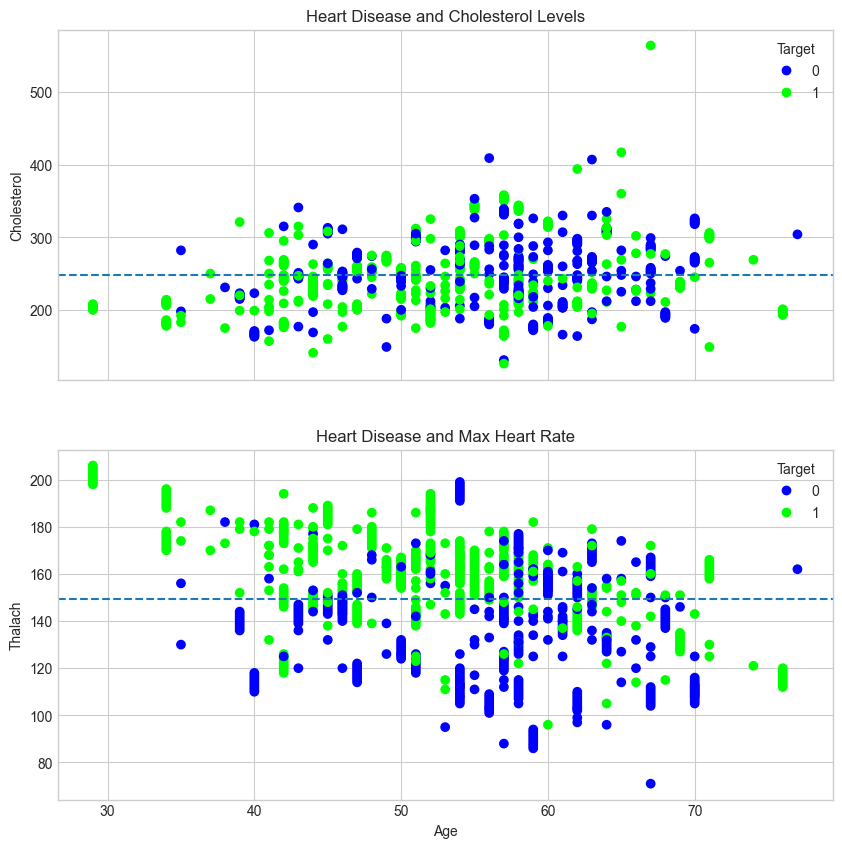

In [15]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')

# Subplots of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                             ncols=1,
                             figsize=(10, 10),
                               sharex=True)

scatter = ax0.scatter(x=df["age"],
                     y=df["chol"],
                     c=df["target"],
                     cmap="brg")
ax0.set(title="Heart Disease and Cholesterol Levels",
       ylabel="Cholesterol")

ax0.legend(*scatter.legend_elements(), title="Target")
ax0.axhline(y=df["chol"].mean(),
           linestyle="--");


scatter = ax1.scatter(x=df["age"],
                     y=df["thalach"],
                     c=df["target"],
                     cmap="brg")
ax1.set(title="Heart Disease and Max Heart Rate",
       xlabel="Age",
       ylabel="Thalach")

ax1.legend(*scatter.legend_elements(), title="Target")
ax1.axhline(y=df["thalach"].mean(),
           linestyle="--");

Từ biểu đồ trên, Ta thấy được mối quan hệ tương quan dương (tương đối thấp) giữa serum cholesterol và age. Đồng thời, ta thấy được tương quan âm  giữa maximum heart rate và age. 

## Preprocessing

In [16]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    if df.isnull().values.any():
        df = df.dropna() # Drop null values
    if df.duplicated().values.any():
        df = df.drop_duplicates() # Drop duplicated rows    
    df = df
    return df
df = preprocessing_data(df.copy())

In [17]:
df = preprocessing_data(df.copy())

## Feature Engineering

In [18]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol',
              'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina',
              'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'diagnosis']
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,diagnosis
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
882,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
883,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
884,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [19]:
df.loc[df['sex'] == 0, 'sex'] = 'female'
df.loc[df['sex'] == 1, 'sex'] = 'male'

df.loc[df['chest_pain_type'] == 0, 'chest_pain_type'] = 'level 1'
df.loc[df['chest_pain_type'] == 1, 'chest_pain_type'] = 'level 2'
df.loc[df['chest_pain_type'] == 2, 'chest_pain_type'] = 'level 3'
df.loc[df['chest_pain_type'] == 3, 'chest_pain_type'] = 'level 4'

df.loc[df['fasting_blood_sugar'] == 0, 'fasting_blood_sugar'] = 'lower than 120mg/ml'
df.loc[df['fasting_blood_sugar'] == 1, 'fasting_blood_sugar'] = 'greater than 120mg/ml'

df.loc[df['rest_ecg'] == 0, 'rest_ecg'] = 'normal'
df.loc[df['rest_ecg'] == 1, 'rest_ecg'] = 'pain'
df.loc[df['rest_ecg'] == 2, 'rest_ecg'] = 'extreme pain'

df.loc[df['exercise_induced_angina'] == 0, 'exercise_induced_angina'] = 'no'
df.loc[df['exercise_induced_angina'] == 1, 'exercise_induced_angina'] = 'yes'

df.loc[df['st_slope'] == 0, 'st_slope'] = 'Upsloping'
df.loc[df['st_slope'] == 1, 'st_slope'] = 'Flat'
df.loc[df['st_slope'] == 2, 'st_slope'] = 'Down sloping'

df.loc[df['thalassemia'] == 1, 'thalassemia'] = 'fixed defect'
df.loc[df['thalassemia'] == 2, 'thalassemia'] = 'normal'
df.loc[df['thalassemia'] == 3, 'thalassemia'] = 'reversable defect'

df.loc[df['diagnosis'] == 1, 'diagnosis'] = 'yes'
df.loc[df['diagnosis'] == 0, 'diagnosis'] = 'no'
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,diagnosis
0,46,male,level 1,120,249,lower than 120mg/ml,normal,144,no,0.8,Down sloping,0,reversable defect,no
1,71,female,level 2,160,302,lower than 120mg/ml,pain,162,no,0.4,Down sloping,2,normal,yes
2,71,female,level 2,160,303,lower than 120mg/ml,pain,163,no,0.4,Down sloping,2,normal,yes
3,71,female,level 2,160,304,lower than 120mg/ml,pain,164,no,0.4,Down sloping,2,normal,yes
4,71,female,level 2,160,305,lower than 120mg/ml,pain,165,no,0.4,Down sloping,2,normal,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,68,female,level 3,120,211,lower than 120mg/ml,normal,115,no,1.5,Flat,0,normal,yes
882,44,female,level 3,108,141,lower than 120mg/ml,pain,175,no,0.6,Flat,0,normal,yes
883,52,male,level 1,128,255,lower than 120mg/ml,pain,161,yes,0.0,Down sloping,1,reversable defect,no
884,59,male,level 4,160,273,lower than 120mg/ml,normal,125,no,0.0,Down sloping,0,normal,no


### Ta đặt lại các biến categorical theo các dữ liệu numerical ban đầu (để sau đó dùng one hot code để train)

In [20]:
df.dtypes


age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
diagnosis                   object
dtype: object

In [21]:
object_cols = df.select_dtypes(include='object').columns
# object = categorical for some time
#print(df.dtypes)

for col in object_cols:
    unique_values = df[col].unique()
    print(f"Unique values of {col}: {unique_values}")

Unique values of sex: ['male' 'female']
Unique values of chest_pain_type: ['level 1' 'level 2' 'level 3' 'level 4']
Unique values of fasting_blood_sugar: ['lower than 120mg/ml' 'greater than 120mg/ml']
Unique values of rest_ecg: ['normal' 'pain' 'extreme pain']
Unique values of exercise_induced_angina: ['no' 'yes']
Unique values of st_slope: ['Down sloping' 'Upsloping' 'Flat']
Unique values of thalassemia: ['reversable defect' 'normal' 'fixed defect' 0]
Unique values of diagnosis: ['no' 'yes']


In [22]:
def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"] # get categorical columns
    cat_cols.remove("diagnosis") # Remove target
    # -- Method 1: categorical features -> numberic features using get_dummies()
    temp = pd.get_dummies(df[cat_cols])
    df.drop(cat_cols, axis=1, inplace=True) # Remove category columns
    df = pd.concat([df, temp], axis=1) # nối dataframe data với các giá trị dummy của feature col

    return df

In [23]:
processed_df = apply_feature_engineering(df.copy())
processed_df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,diagnosis,sex_female,sex_male,chest_pain_type_level 1,...,rest_ecg_pain,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_Down sloping,st_slope_Flat,st_slope_Upsloping,thalassemia_0,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,46,120,249,144,0.8,0,no,0,1,1,...,0,1,0,1,0,0,0,0,0,1
1,71,160,302,162,0.4,2,yes,1,0,0,...,1,1,0,1,0,0,0,0,1,0
2,71,160,303,163,0.4,2,yes,1,0,0,...,1,1,0,1,0,0,0,0,1,0
3,71,160,304,164,0.4,2,yes,1,0,0,...,1,1,0,1,0,0,0,0,1,0
4,71,160,305,165,0.4,2,yes,1,0,0,...,1,1,0,1,0,0,0,0,1,0


,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_female,sex_male,chest_pain_type_level 1,chest_pain_type_level 2,...,rest_ecg_pain,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_Down sloping,st_slope_Flat,st_slope_Upsloping,thalassemia_0,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
age,1.000000,0.337231,0.222152,-0.364585,0.260906,0.271855,0.078459,-0.078459,0.073333,-0.103118,...,-0.009988,-0.125929,0.125929,-0.220380,0.194669,0.070080,-0.007863,0.085587,-0.135783,0.099445
resting_blood_pressure,0.337231,1.000000,0.022509,-0.082958,0.169383,0.176673,-0.064870,0.064870,-0.059939,0.062821,...,-0.138517,0.006576,-0.006576,-0.040266,0.005503,0.097273,-0.011659,0.096417,-0.150222,0.109474
cholesterol,0.222152,0.022509,1.000000,-0.050853,0.061578,0.213909,0.280802,-0.280802,0.114304,0.030455,...,0.040384,-0.157342,0.157342,-0.017171,0.032540,-0.043347,-0.037801,-0.213223,0.035214,0.071274
max_heart_rate_achieved,-0.364585,-0.082958,-0.050853,1.000000,-0.398322,-0.298086,0.096892,-0.096892,-0.479594,0.329732,...,0.162515,0.420237,-0.420237,0.508874,-0.498389,-0.024481,-0.027838,-0.156017,0.305267,-0.236747
st_depression,0.260906,0.169383,0.061578,-0.398322,1.000000,0.287669,-0.152399,0.152399,0.279919,-0.277802,...,-0.080176,-0.269824,0.269824,-0.475408,0.387195,0.243185,-0.024183,0.070067,-0.345819,0.325754
num_major_vessels,0.271855,0.176673,0.213909,-0.298086,0.287669,1.000000,-0.120516,0.120516,0.346238,-0.175483,...,-0.095678,-0.219526,0.219526,-0.247560,0.265844,-0.053787,-0.033049,0.029862,-0.237214,0.233967
sex_female,0.078459,-0.064870,0.280802,0.096892,-0.152399,-0.120516,1.000000,-1.000000,-0.073654,0.129959,...,0.184135,0.130696,-0.130696,-0.009702,0.029894,-0.056823,0.018822,-0.155715,0.389543,-0.328684
sex_male,-0.078459,0.064870,-0.280802,-0.096892,0.152399,0.120516,-1.000000,1.000000,0.073654,-0.129959,...,-0.184135,-0.130696,0.130696,0.009702,-0.029894,0.056823,-0.018822,0.155715,-0.389543,0.328684
chest_pain_type_level 1,0.073333,-0.059939,0.114304,-0.479594,0.279919,0.346238,-0.073654,0.073654,1.000000,-0.402052,...,-0.131342,-0.491108,0.491108,-0.320535,0.328767,-0.026262,0.004748,0.053904,-0.352306,0.337436
chest_pain_type_level 2,-0.103118,0.062821,0.030455,0.329732,-0.277802,-0.175483,0.129959,-0.129959,-0.402052,1.000000,...,0.162262,0.219083,-0.219083,0.300851,-0.282893,-0.047512,-0.021128,-0.082260,0.243409,-0.209413


<AxesSubplot:>

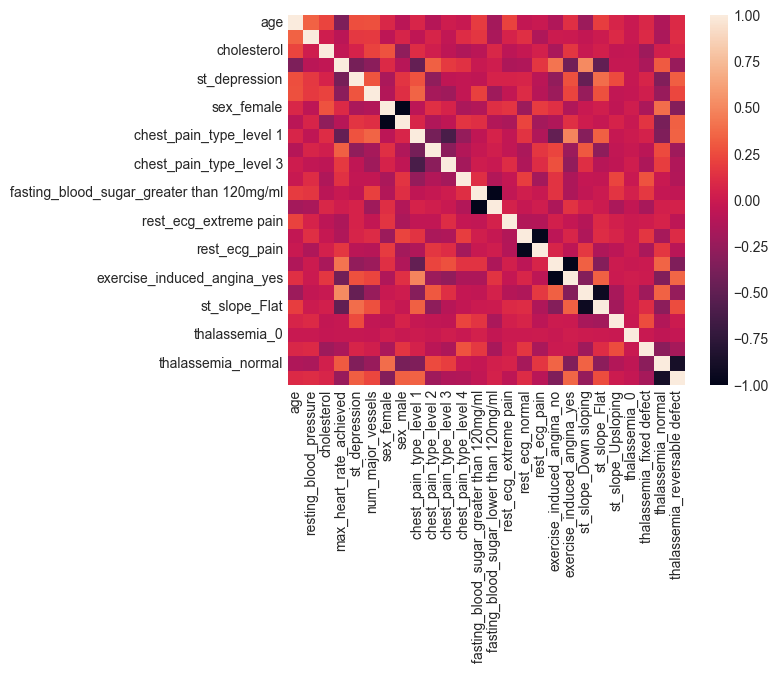

In [24]:
# Heatmap
import seaborn as sns
display(processed_df.corr())
sns.heatmap(processed_df.corr()) # Show heatmap after normalized data

In [25]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """

    X = df.drop('diagnosis', axis=1, inplace=False).values

    y = df['diagnosis']
    y = np.array([0 if i=="no" else 1 for i in y ])
    y = y.reshape((-1, 1))
    return X, y

X, y = prepare_X_y(processed_df)

In [26]:
from sklearn.model_selection import train_test_split

trainX, testX ,trainY, testY = train_test_split(X, y, test_size=0.3, random_state=101)     # Split data into train and test


In [27]:
from sklearn.linear_model import LogisticRegression

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """


    model = LogisticRegression(max_iter=10000)
    # Todo: fit your model with X, y
    model.fit(X, y)

    return model


In [28]:
log_model = build_model(trainX, np.ravel(trainY))
display(log_model)

# Get score
log_model.score(testX, testY)

LogisticRegression(max_iter=10000)

0.924812030075188

Confusion Matrix:
[[101  12]
 [  8 145]]


<AxesSubplot:title={'center':'Confusion Matrix for GBC'}, xlabel='Predicted label', ylabel='True label'>

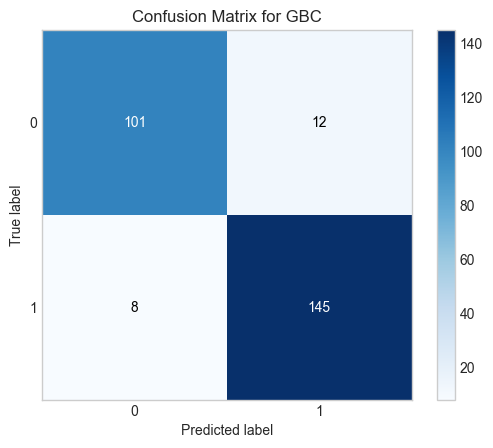

In [29]:


# Assuming that you already have trained your model and made predictions on a test set
y_pred = log_model.predict(testX)

# Compute the confusion matrix
cm = confusion_matrix(testY, y_pred)

print("Confusion Matrix:")
print(cm)
skplt.metrics.plot_confusion_matrix(testY, y_pred,
                                    normalize=False, title = 'Confusion Matrix for GBC')

## Train-test split

In [30]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 14
TRAIN_SIZE = 0.8

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)



## Build SK-learn model

In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 14
TRAIN_SIZE = 0.8


# Split data into train and test sets
trainX, testX, trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Create pipeline with standard scaler and logistic regression
    pipeline = make_pipeline(StandardScaler(), 
                             LogisticRegression(random_state=RANDOM_STATE))

    # Define hyperparameters to tune
    hyperparameters = {'logisticregression__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                       'logisticregression__solver': [ 'lbfgs', 'liblinear', 'sag', 'saga']}

    # Use grid search with cross-validation to find best hyperparameters
    from sklearn.model_selection import GridSearchCV
    clf = GridSearchCV(pipeline, hyperparameters, cv=5, n_jobs=-1)
    clf.fit(X, y)
    results = clf.cv_results_
    print("Scores for all parameter combinations in GridSearchCV:")
    for mean_score, std_score, params in zip(results["mean_test_score"], 
                                             results["std_test_score"], 
                                             results["params"]):
        print("{:.3f} (+/-{:.03f}) for {}".format(mean_score, std_score * 2, params))
    print("Best score:", clf.best_score_)
    print("Best parameters:", clf.best_params_)
    return clf

def calculate_performance(y_true, y_pred):
    """
    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Calculate and output model performance metrics
    print("classification report:")
    print(classification_report(y_true, y_pred))
    
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    
    print("precision: ", precision)
    print("recall: ", recall)
    print("accuracy: ", accuracy)
    print("F1 score: ", f1)
    
    # Choose accuracy as the main score for the question 7
    main_score = accuracy
    return main_score

model = build_model(trainX, np.ravel(trainY))

# Compare on training dataset
train_pred = model.predict(trainX)
train_score = calculate_performance(trainY, train_pred)
print("Training set accuracy: ", train_score)

# Compare on test dataset
test_pred = model.predict(testX)
test_score = calculate_performance(testY, test_pred)
print("Test set accuracy: ", test_score)


Scores for all parameter combinations in GridSearchCV:
nan (+/-nan) for {'logisticregression__penalty': 'l1', 'logisticregression__solver': 'lbfgs'}
0.951 (+/-0.015) for {'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
nan (+/-nan) for {'logisticregression__penalty': 'l1', 'logisticregression__solver': 'sag'}
0.951 (+/-0.015) for {'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
0.949 (+/-0.021) for {'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
0.949 (+/-0.021) for {'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
0.949 (+/-0.021) for {'logisticregression__penalty': 'l2', 'logisticregression__solver': 'sag'}
0.949 (+/-0.021) for {'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}
nan (+/-nan) for {'logisticregression__penalty': 'elasticnet', 'logisticregression__solver': 'lbfgs'}
nan (+/-nan) for {'logisticregression__penalty': 'elasticnet', 'l

#### Ta được accuracy ở tập test là 0.949 khi chọn các hyperameters lận lượt là 'penalty': 'l1', 'solver': 'liblinear'

### Lưu ý theo document của scikit learn thì các hyperameters của logisticregression sẽ chỉ được hỗ trợ như sau:

Warning The choice of the algorithm depends on the penalty chosen. Supported penalties by solver:

‘lbfgs’ - [‘l2’, None]

‘liblinear’ - [‘l1’, ‘l2’]

‘newton-cg’ - [‘l2’, None]

‘sag’ - [‘l2’, None]

‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]

Vậy nên crossvalidation chỉ có thể chạy được những cặp phù hợp và sẽ báo warning với những cặp penalty và solver không được hỗ trợ ( warnings.filterwarnings("ignore") ở trên)

<AxesSubplot:title={'center':'Confusion Matrix for GBC'}, xlabel='Predicted label', ylabel='True label'>

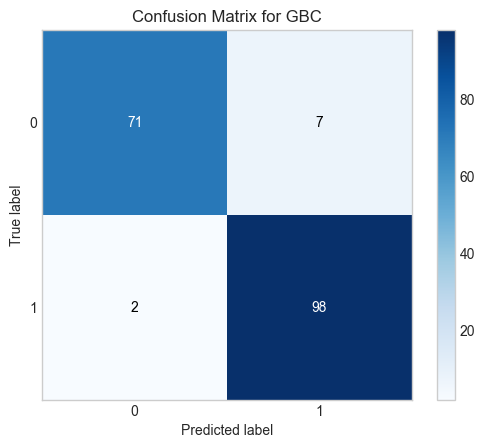

In [32]:
skplt.metrics.plot_confusion_matrix(testY, test_pred,
                                    normalize=False, title = 'Confusion Matrix for GBC')

The AUC is  0.9451282051282051


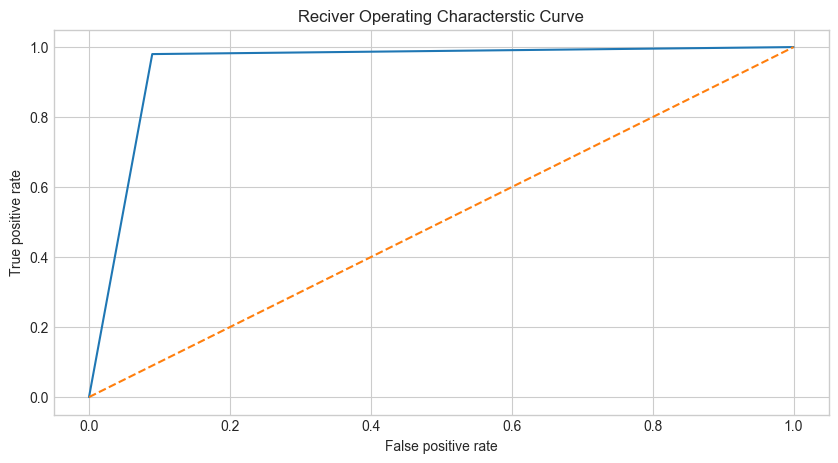

In [33]:
fpr, tpr, thresholds  = roc_curve(testY,test_pred)
print("The AUC is ",auc(fpr, tpr))
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.plot([0,1],ls='--')
plt.show()

In [34]:
import sklearn
sklearn.metrics.roc_auc_score(testY,test_pred)

0.9451282051282051

Bây giờ chúng ta hãy xem đường cong Receiver operating characteristic curve (ROC curve) và diện tích dưới đường cong (AUC) cho model này. ROC là một probability curve và AUC đại diện cho mức độ hoặc khả năng phân loại các lớp. AUC càng cao, mô hình càng phân biệt tốt giữa bệnh nhân mắc bệnh và không mắc bệnh. Một mô hình càng gần bằng 1 là càng tốt (khả năng phân lớp).

In [35]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "Moi thay xem markdown line phia duoi a. " \
           "Other conclusion: "

Đối với em đây là bài toán ước lượng model với mục đích là để xác định chính xác các cases nào mắc bệnh tim mạch thế nên metric chính mà em chọn là classification accuracy (true positives + true negatives /total number of samples ).

Nhưng đồng thời nếu chỉ chú trọng accuracy thì có thể misleading khi dataset không đều ( imbalanced ) dẫn đến việc bị overfitting hay không có tính thực tiễn khi chạy ở các trường hợp bên ngoài ( pratical test ).Chẳng hạn như khi quá lệch thì việc chỉ dự đoán đều là âm tính hoặc ngược lại có thể cho ra accuracy cao. Nhưng ở đây vi dataset khá "đẹp"(balance) nên việc chọn accuracy không dẫn đến misleading.

Có thể thấy với việc chọn các hyperameters lận lượt là 'penalty': 'l1', 'solver': 'liblinear' thì ta được accuracy bằng =0.949 thì các metric khác đều có giá trị cao hơn 0.93 ( nhỏ nhất là precision = 0.93 )

Nhưng cụ thể xét trường hợp nếu ưu tiên là đảm bảo mô hình dự đoán bệnh tim chính xác cho những người mắc bệnh, thì độ đo để sử dụng là "precision". Precision đo tỷ lệ true positive so với tất cả các positive mà mô hình thực hiện. Độ chính xác cao có nghĩa là model đang dự đoán đúng các trường hợp dương tính, trong trường hợp này là các cá nhân mắc bệnh tim. Do đó, "precision" cao là mong muốn khi bạn muốn đảm bảo rằng mô hình dự đoán sự có mặt của bệnh tim một cách chính xác.